# Apache Spark - Notebook in Azure Synapse Analytics Prepared by Bamidele Ajamu

In [1]:
%%pyspark
df = spark.read.load('abfss://files@datalake8oapglt.dfs.core.windows.net/sales/orders/2019.csv', format='csv'
## If header exists uncomment line below
##, header=True
)
display(df.limit(10))

StatementMeta(spark8oapglt, 0, 2, Finished, Available)

SynapseWidget(Synapse.DataFrame, 1f0ce330-cef1-4938-9f1c-c046de20f56c)

In [3]:
%%pyspark

df = spark.read.load('abfss://files@datalake8oapglt.dfs.core.windows.net/sales/orders/*.csv', format='csv')
display(df.limit(10))

# Toretrieve all sales for all years

StatementMeta(spark8oapglt, 0, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, 812f26a5-979b-40c4-9e00-8d0abd0bd031)

In [6]:
 %%pyspark
 from pyspark.sql.types import *
 from pyspark.sql.functions import *

 orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
     ])

df = spark.read.load('abfss://files@datalake8oapglt.dfs.core.windows.net/sales/orders/*.csv', format='csv', schema=orderSchema)
display(df.limit(10))


StatementMeta(spark8oapglt, 0, 7, Finished, Available)

SynapseWidget(Synapse.DataFrame, 761375aa-ee73-47e4-afb1-f2c82c656cb5)

In [7]:
df.printSchema()

StatementMeta(spark8oapglt, 0, 8, Finished, Available)

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)



**Filter a dataframe**

In [8]:
 customers = df['CustomerName', 'Email']
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())

StatementMeta(spark8oapglt, 0, 9, Finished, Available)

32718
12427


SynapseWidget(Synapse.DataFrame, 9c922daf-231b-41dc-a74c-a119e3adcd5a)

**_customers who have purchased the Road-250 Red, 52 product_**

In [9]:
 customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())

StatementMeta(spark8oapglt, 0, 10, Finished, Available)

133
133


SynapseWidget(Synapse.DataFrame, 3bef76b8-0cde-45a2-96eb-671de8f0be89)

**Aggregate and group data in a dataframe**

In [10]:
 productSales = df.select("Item", "Quantity").groupBy("Item").sum()
 display(productSales)

StatementMeta(spark8oapglt, 0, 11, Finished, Available)

SynapseWidget(Synapse.DataFrame, 7cf9d7f6-01da-4306-9723-0e74e8cee7c1)

In [11]:
 yearlySales = df.select(year("OrderDate").alias("Year")).groupBy("Year").count().orderBy("Year")
 display(yearlySales)

StatementMeta(spark8oapglt, 0, 12, Finished, Available)

SynapseWidget(Synapse.DataFrame, 2f59e316-f2fe-443e-bd1e-567a29dd9c57)

# **Query data using Spark SQL**

In [12]:
 df.createOrReplaceTempView("salesorders")

 spark_df = spark.sql("SELECT * FROM salesorders")
 display(spark_df)

StatementMeta(spark8oapglt, 0, 13, Finished, Available)

SynapseWidget(Synapse.DataFrame, e26a3e2b-dd65-4205-b733-a33f61cec405)

**Run SQL code in a cell******

In [13]:
 %%sql
 SELECT YEAR(OrderDate) AS OrderYear,
        SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
 FROM salesorders
 GROUP BY YEAR(OrderDate)
 ORDER BY OrderYear;

StatementMeta(spark8oapglt, 0, 14, Finished, Available)

<Spark SQL result set with 3 rows and 2 fields>

# Visualize data with Spark

In [15]:
 %%sql
 SELECT YEAR(OrderDate) AS OrderYear,
        SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
 FROM salesorders
 GROUP BY YEAR(OrderDate)
 ORDER BY OrderYear;

StatementMeta(spark8oapglt, 0, 16, Finished, Available)

<Spark SQL result set with 3 rows and 2 fields>

# Get started with matplotlib

In [16]:
 sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                 SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
             FROM salesorders \
             GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
             ORDER BY OrderYear"
 df_spark = spark.sql(sqlQuery)
 df_spark.show()

StatementMeta(spark8oapglt, 0, 17, Finished, Available)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(spark8oapglt, 0, 18, Finished, Available)

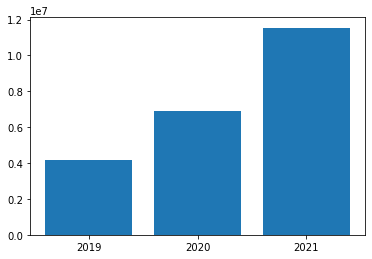

In [17]:
 from matplotlib import pyplot as plt

 # matplotlib requires a Pandas dataframe, not a Spark one
 df_sales = df_spark.toPandas()

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

 # Display the plot
 plt.show()

StatementMeta(spark8oapglt, 0, 19, Finished, Available)

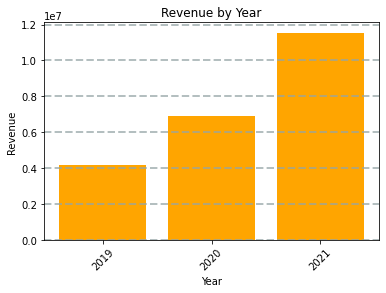

In [18]:
 # Clear the plot area
 plt.clf()

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

 # Customize the chart
 plt.title('Revenue by Year')
 plt.xlabel('Year')
 plt.ylabel('Revenue')
 plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
 plt.xticks(rotation=45)

 # Show the figure
 plt.show()

StatementMeta(spark8oapglt, 0, 20, Finished, Available)

<Figure size 432x288 with 0 Axes>

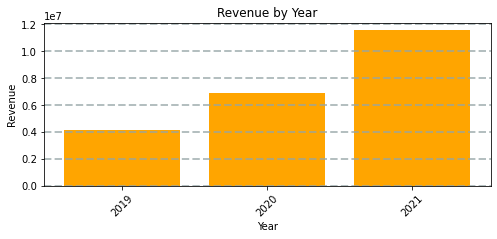

In [19]:
 # Clear the plot area
 plt.clf()

 # Create a Figure
 fig = plt.figure(figsize=(8,3))

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

 # Customize the chart
 plt.title('Revenue by Year')
 plt.xlabel('Year')
 plt.ylabel('Revenue')
 plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
 plt.xticks(rotation=45)

 # Show the figure
 plt.show()

StatementMeta(spark8oapglt, 0, 21, Finished, Available)

<Figure size 432x288 with 0 Axes>

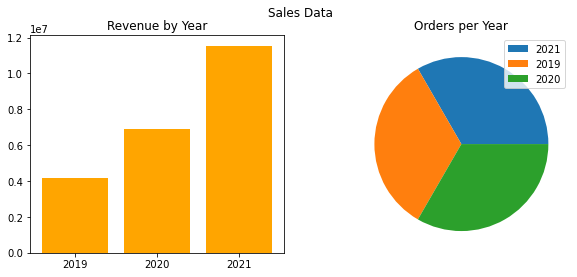

In [20]:
 # Clear the plot area
 plt.clf()

 # Create a figure for 2 subplots (1 row, 2 columns)
 fig, ax = plt.subplots(1, 2, figsize = (10,4))

 # Create a bar plot of revenue by year on the first axis
 ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
 ax[0].set_title('Revenue by Year')

 # Create a pie chart of yearly order counts on the second axis
 yearly_counts = df_sales['OrderYear'].value_counts()
 ax[1].pie(yearly_counts)
 ax[1].set_title('Orders per Year')
 ax[1].legend(yearly_counts.keys().tolist())

 # Add a title to the Figure
 fig.suptitle('Sales Data')

 # Show the figure
 plt.show()

# Use the seaborn library

StatementMeta(spark8oapglt, 0, 22, Finished, Available)

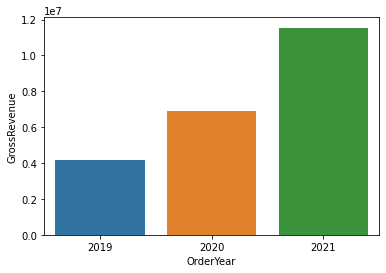

In [21]:
 import seaborn as sns

 # Clear the plot area
 plt.clf()

 # Create a bar chart
 ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()

StatementMeta(spark8oapglt, 0, 23, Finished, Available)

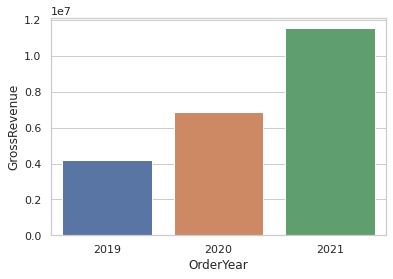

In [22]:
 # Clear the plot area
 plt.clf()

 # Set the visual theme for seaborn
 sns.set_theme(style="whitegrid")

 # Create a bar chart
 ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()

StatementMeta(spark8oapglt, 0, 24, Finished, Available)

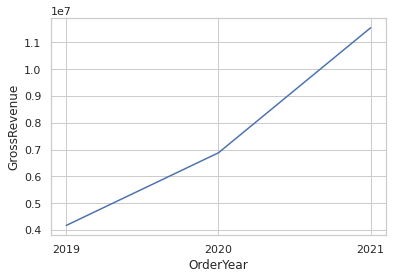

In [23]:
 # Clear the plot area
 plt.clf()

 # Create a bar chart
 ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()